**DATA EXPLORATION AND TRANSFORMATION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

DATA LOADING

In [2]:
# Read the CSV
sncb_df = pd.read_csv("sncb_data_challenge.csv", sep='\;', engine='python', index_col=0)

# Convert the arrays columns to NumPy arrays (for str arrays)
for column in ["vehicles_sequence", "events_sequence"]:
  sncb_df[column] = sncb_df[column].apply(lambda x: np.array(x.strip("[]").split(", "), dtype=str))

# Convert the arrays columns to NumPy arrays (for float arrays)
for column in ["seconds_to_incident_sequence", "train_kph_sequence"]:
  sncb_df[column] = sncb_df[column].apply(lambda x: np.array(x.strip("[]").split(", "), dtype=float))

# Convert the arrays columns to NumPy arrays (for bool arrays)
for column in ["dj_ac_state_sequence", "dj_dc_state_sequence"]:
  sncb_df[column] = sncb_df[column].apply(lambda x: (np.array(x.strip("[]").split(", "), dtype=object) == "True"))

# Check the data
sncb_df.head()

,incident_id,vehicles_sequence,events_sequence,seconds_to_incident_sequence,approx_lat,approx_lon,train_kph_sequence,dj_ac_state_sequence,dj_dc_state_sequence,incident_type
0,4432881,"[609, 609, 609, 609, 609, 609, 609, 609, 609, ...","[2744, 4004, 2852, 4110, 2854, 4396, 1132, 414...","[-5510.0, -5510.0, -5507.0, -5507.0, -5506.0, ...",50.876601,4.718143,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",4
1,4432943,"[526, 526, 526, 526, 526, 526, 526, 526, 526, ...","[2744, 4148, 4394, 1566, 1570, 4396, 3634, 412...","[-8573.0, -8573.0, -8032.0, -8032.0, -8032.0, ...",51.037435,4.431218,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.1,...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",13
2,4432955,"[592, 592, 592, 592, 592, 592, 592, 592, 592, ...","[4394, 1566, 1570, 4114, 4168, 4168, 4156, 406...","[-12291.0, -12291.0, -12291.0, -10932.0, -1093...",50.864083,4.162115,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, False, True, Tr...",14
3,4433021,"[576, 576, 576, 576, 576, 576, 576, 576, 576, ...","[4066, 4066, 4066, 4066, 4068, 2742, 4026, 270...","[-14351.0, -14204.0, -13890.0, -13383.0, -1273...",51.183220,4.276025,"[0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",2
4,4433129,"[634, 634, 634, 634, 634, 634, 634, 634, 634, ...","[4002, 4032, 4028, 2852, 4026, 4110, 2742, 285...","[-224.0, -224.0, -223.0, -222.0, -222.0, -222....",50.818727,3.253601,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",14


In [3]:
sncb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1011 entries, 0 to 1010
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   incident_id                   1011 non-null   int64  
 1   vehicles_sequence             1011 non-null   object 
 2   events_sequence               1011 non-null   object 
 3   seconds_to_incident_sequence  1011 non-null   object 
 4   approx_lat                    1011 non-null   float64
 5   approx_lon                    1011 non-null   float64
 6   train_kph_sequence            1011 non-null   object 
 7   dj_ac_state_sequence          1011 non-null   object 
 8   dj_dc_state_sequence          1011 non-null   object 
 9   incident_type                 1011 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 86.9+ KB


There are 1011 rows and 10 columns in the sncb csv file.

1.   incident_id (necessary just for reality check mostly)
2.   incident_type (our label variable for the ML)
3.   approx_lat (float value ready for next phase)
4.   approx_lon (float value ready for next phase)
5.   the other six are arrays that need some transformation and extraction, both to explore and to derive features for ML: vehicles_sequence events_sequence seconds_to_incident_sequence train_kph_sequence dj_ac_state_sequence dj_dc_state_sequence





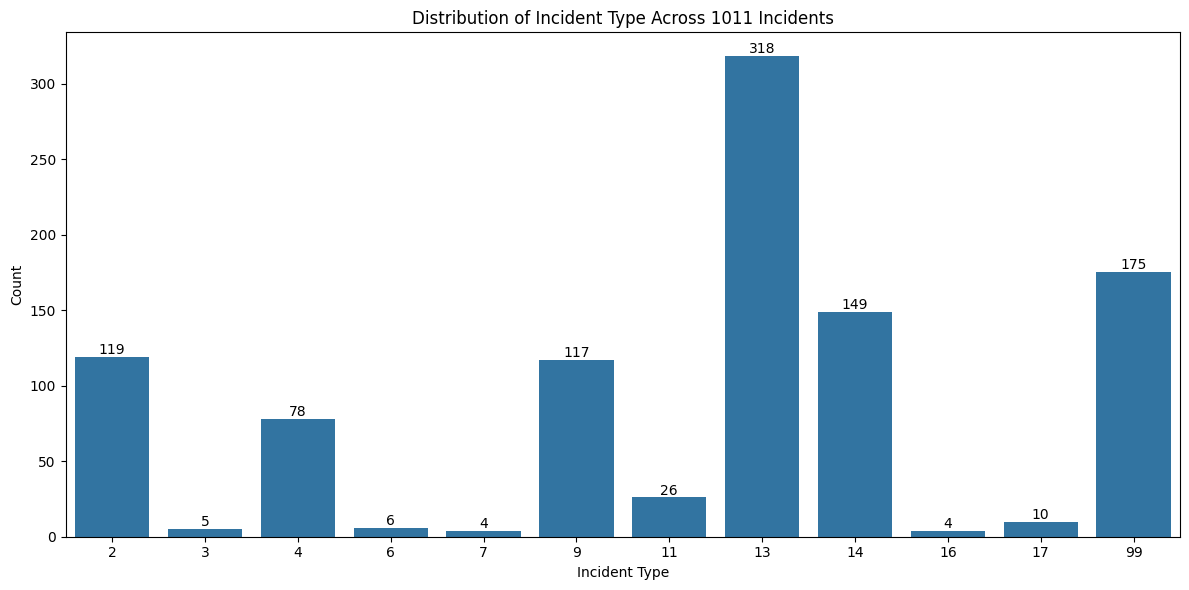

In [4]:
# Calculate the counts for each incident type
incident_counts = sncb_df['incident_type'].value_counts()

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='incident_type', data=sncb_df)

# Add the counts above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Incident Type Across 1011 Incidents')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

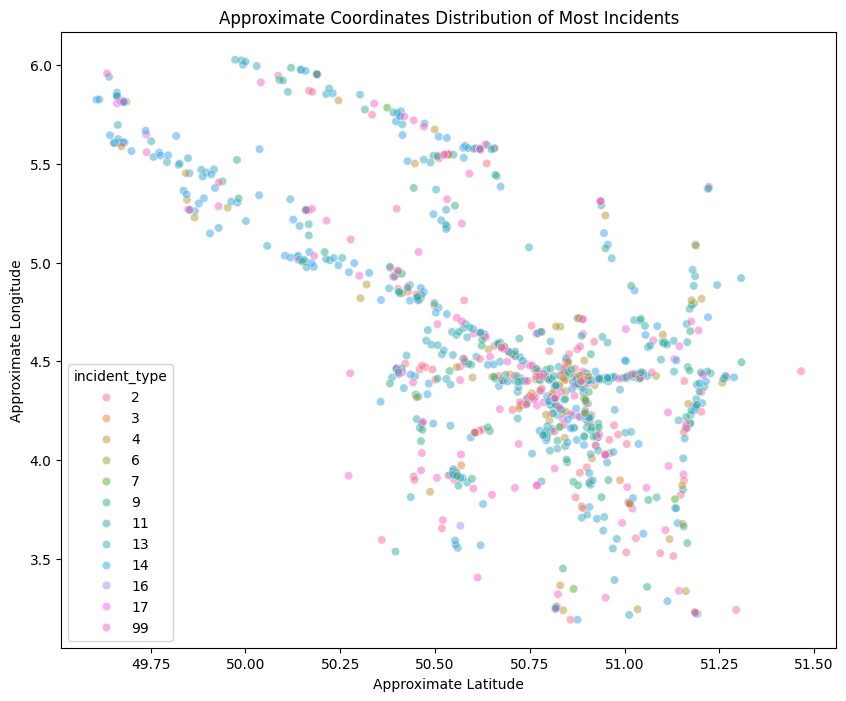

In [5]:
# Filter data for plotting, removing the outliers
filtered_sncb_df = sncb_df[sncb_df['approx_lat'] > 47.5]
filtered_sncb_df = filtered_sncb_df[filtered_sncb_df['approx_lon'] > 3]

# Convert 'incident_type' to category only for plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='approx_lat', y='approx_lon', data=filtered_sncb_df, hue=filtered_sncb_df['incident_type'].astype('category'), alpha=0.5)
plt.title('Approximate Coordinates Distribution of Most Incidents')
plt.xlabel('Approximate Latitude')
plt.ylabel('Approximate Longitude')
plt.show()

After inspecting the non-array columns of sncb_df we are only left now with the array columns, each of which needs some transformation to be useful.

In [6]:
# MOST COMMON EVENT ACROSS ALL EVENTS FROM ALL INCIDENTS
data = np.array([])
for row in sncb_df['events_sequence']:
  data = np.concatenate((data, row))

typeAll_events_count = pd.DataFrame(pd.DataFrame(data, columns=['event_type']).value_counts().sort_values(ascending=False), columns=['count'])
typeAll_events_count.reset_index(inplace=True)
typeAll_events_count['event_freq'] = typeAll_events_count['event_type'].apply(lambda x: sncb_df['events_sequence'].apply(lambda y: x in y).sum()/len(sncb_df))

Counting the raw quantity of events across all arrays from all incident types.

In [7]:
typeAll_events_count.sort_values(by=["count"], axis = 0, ascending = False)

,event_type,count,event_freq
0,2956,291975,0.851632
1,3658,26608,0.880317
2,3636,26491,0.876360
3,4066,23018,0.941642
4,4068,22951,0.934718
...,...,...,...
864,4212,1,0.000989
865,2928,1,0.000989
914,950,1,0.000989
915,1040,1,0.000989


From the typeAll_events_count dataframe, we see that the event_type 2956 has the highest count at 291975.

Counting the frequency of an event across all arrays from all incident types (logic: happens in that row-array-document or not).

The high frequency can be dealth with TF-IDF and low frequency should be removed (starting with count == 1).

In [8]:
typeAll_events_count.sort_values(by=["event_freq"], axis = 0, ascending = False)

,event_type,count,event_freq
6,2708,8046,0.993076
5,4026,12207,0.985163
3,4066,23018,0.941642
4,4068,22951,0.934718
12,4148,4138,0.907023
...,...,...,...
864,4212,1,0.000989
865,2928,1,0.000989
914,950,1,0.000989
915,1040,1,0.000989


From the typeAll_events_count dataframe, we see that the event_type 2708 has the highest frequency at 0.993076.

In [9]:
# Creating the event_type_df with all the events that have a count of 1 in typeAll_events_count
event_type_df = typeAll_events_count.loc[typeAll_events_count['count'] == 1, ['event_type', 'count']]

event_type_df

,event_type,count
826,3274,1
827,3282,1
828,3278,1
829,3288,1
830,3290,1
...,...,...
912,3692,1
913,4374,1
914,950,1
915,1040,1


We see from the event_type_df that there are 91 events that happen only once in the whole sncb_df so we will remove them shortly, arriving at 826 event types to be used as features after the tf-idf transformation.

In [10]:
# Creating the array of event types to be removed
event_type_array = event_type_df['event_type'].values

# this array will be used in the end of this document to implement the tf-idf

In [11]:
318/1011

0.314540059347181

The most common incident type (13) happens 318/1011 = 31.45% of the time.

DATA TRANSFORMATION SECTION

Here we will expand the arrays and extract information from it.

DATA TRANSFORMATION

1.   Unique Vehicles Number: u_vehicles_number



In [12]:
# get the number of unique vehicles types per train and store in a new attribute
sncb_df['u_vehicles_number'] = sncb_df['vehicles_sequence'].apply(lambda x: len(set(x)))

sncb_df['u_vehicles_number'].describe()

count    1011.000000
mean        1.748764
std         0.724525
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: u_vehicles_number, dtype: float64

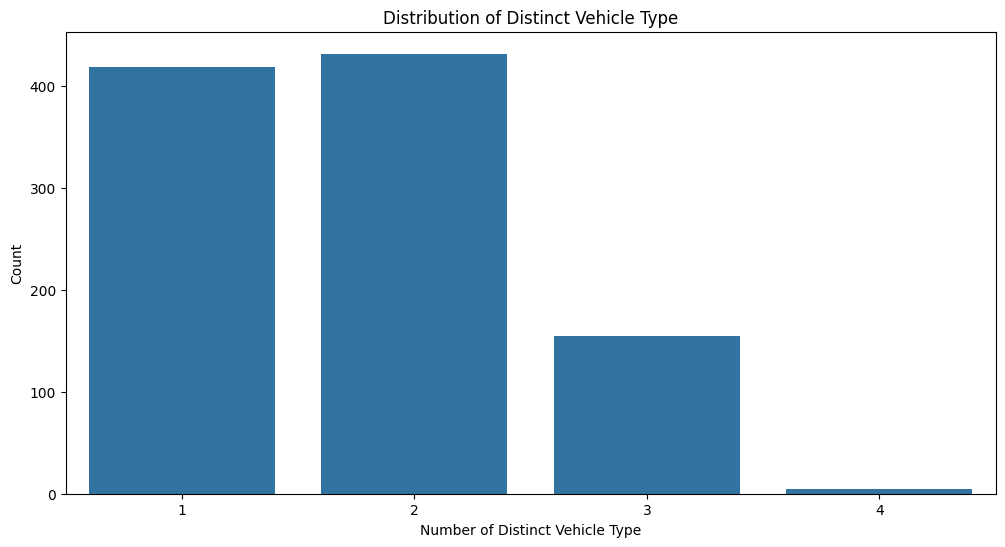

In [13]:
# plot for the Distribution of Distinct Vehicle Type
plt.figure(figsize=(12, 6))
sns.barplot(x=sncb_df['u_vehicles_number'].value_counts().index, y=sncb_df['u_vehicles_number'].value_counts().values)
plt.title('Distribution of Distinct Vehicle Type')
plt.xlabel('Number of Distinct Vehicle Type')
plt.ylabel('Count')
plt.show()

So vehicles per train vary from 1 to 4 distinct types.

DATA TRANSFORMATION

2.   Unique Events Number: u_events_number

In [14]:
# get the number of unique events types per train and store in a new attribute
sncb_df['u_events_number'] = sncb_df['events_sequence'].apply(lambda x: len(set(x)))

sncb_df['u_events_number'].describe()

count    1011.000000
mean       51.208704
std        22.132476
min         9.000000
25%        34.000000
50%        50.000000
75%        65.500000
max       172.000000
Name: u_events_number, dtype: float64

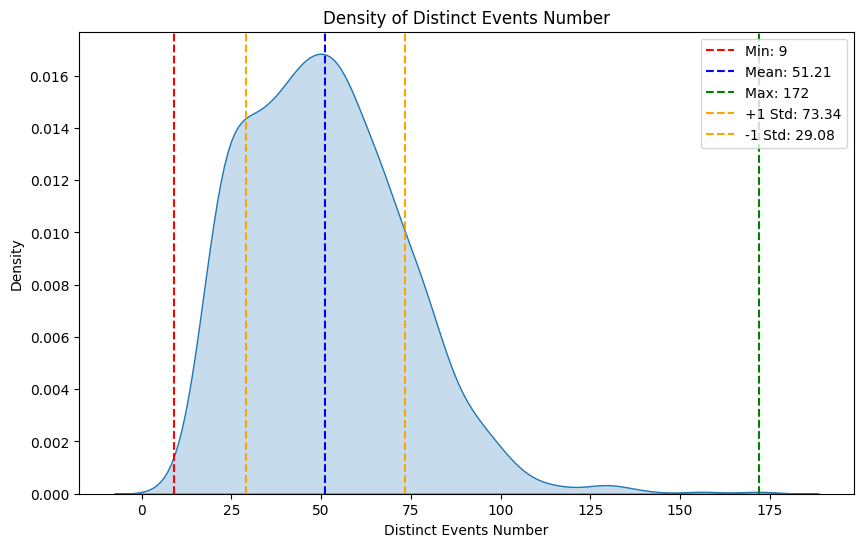

In [15]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['u_events_number'].min()
mean_val = sncb_df['u_events_number'].mean()
max_val = sncb_df['u_events_number'].max()
std_val = sncb_df['u_events_number'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['u_events_number'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')


plt.title('Density of Distinct Events Number')
plt.xlabel('Distinct Events Number')
plt.ylabel('Density')
plt.legend()
plt.show()

So the number of distinct event types per incident range from 9 to 172.

DATA TRANSFORMATION

3.   Events Sequence Size: event_sequence_size

In [16]:
# get the size of the events sequence
sncb_df['events_sequence_size'] = sncb_df['events_sequence'].apply(lambda x: len(x))

sncb_df['events_sequence_size'].describe()

count    1011.000000
mean      553.197824
std       314.852092
min        10.000000
25%       307.500000
50%       554.000000
75%       746.000000
max      2407.000000
Name: events_sequence_size, dtype: float64

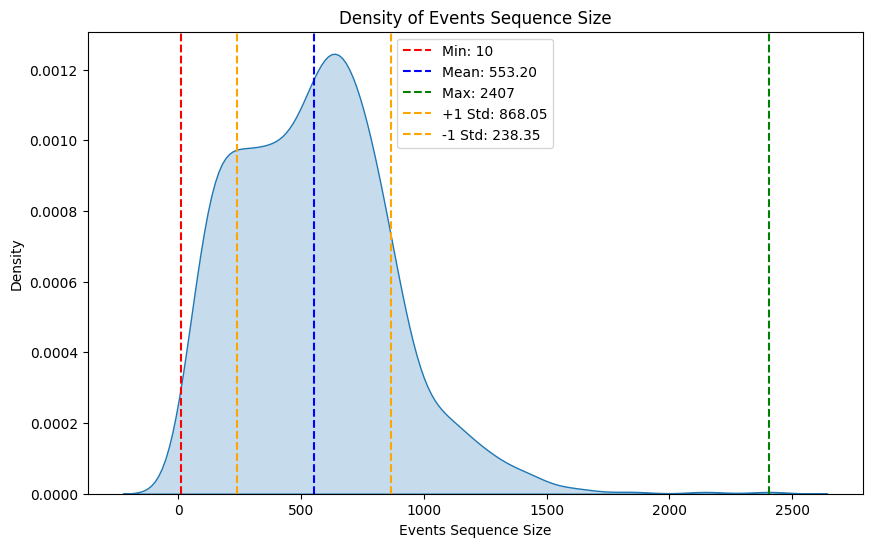

In [17]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['events_sequence_size'].min()
mean_val = sncb_df['events_sequence_size'].mean()
max_val = sncb_df['events_sequence_size'].max()
std_val = sncb_df['events_sequence_size'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['events_sequence_size'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')

plt.title('Density of Events Sequence Size')
plt.xlabel('Events Sequence Size')
plt.ylabel('Density')
plt.legend()
plt.show()

So the events sequence size range from 10 to 2407.

So the events sequence from each train vary from 10 to 2407.

DATA TRANSFORMATION

TIME CODE

variations from seconds_to_incident_sequence

In [18]:
sncb_df['min_seconds'] = sncb_df['seconds_to_incident_sequence'].apply(lambda x: min(x))

sncb_df['min_seconds'].describe()

count     1011.000000
mean    -12393.096934
std       3481.388459
min     -14400.000000
25%     -14385.000000
50%     -14265.000000
75%     -12123.000000
max       -227.000000
Name: min_seconds, dtype: float64

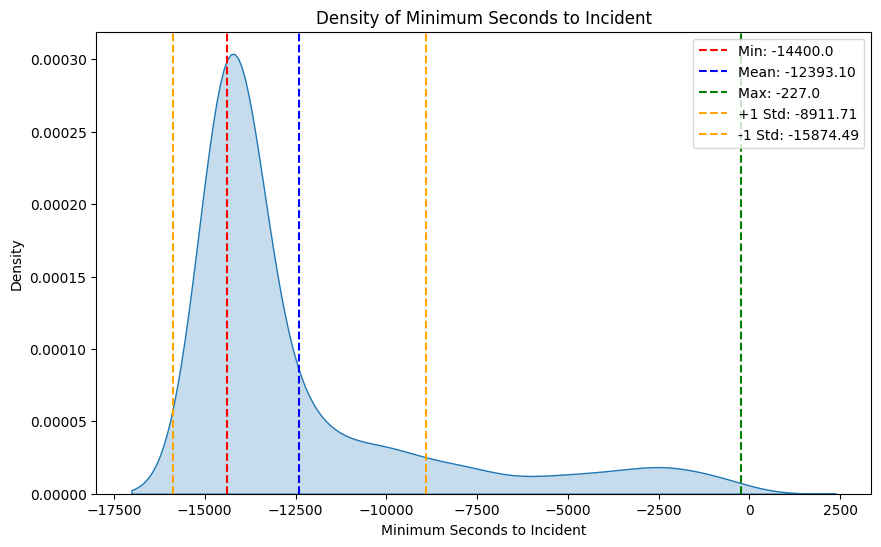

In [19]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['min_seconds'].min()
mean_val = sncb_df['min_seconds'].mean()
max_val = sncb_df['min_seconds'].max()
std_val = sncb_df['min_seconds'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['min_seconds'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')

plt.title('Density of Minimum Seconds to Incident')
plt.xlabel('Minimum Seconds to Incident')
plt.ylabel('Density')
plt.legend()
plt.show()

So the minimum seconds to incident range from -14400s to -227.

In [20]:
row_with_positive_min_seconds = sncb_df[sncb_df['min_seconds'] > 0]
len(row_with_positive_min_seconds)

0

So the measurement of all incidents start before the incident.

In [21]:
sncb_df['median_seconds'] = sncb_df['seconds_to_incident_sequence'].apply(lambda x: np.median(x))

sncb_df['median_seconds'].describe()

count     1011.000000
mean     -3731.553907
std       2677.750507
min     -13867.000000
25%      -5678.000000
50%      -4125.500000
75%      -1534.500000
max       2742.000000
Name: median_seconds, dtype: float64

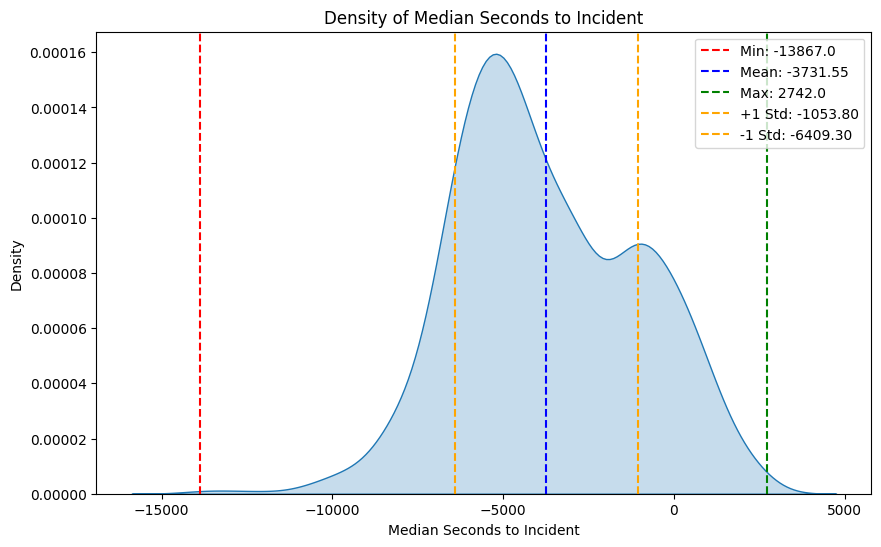

In [22]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['median_seconds'].min()
mean_val = sncb_df['median_seconds'].mean()
max_val = sncb_df['median_seconds'].max()
std_val = sncb_df['median_seconds'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['median_seconds'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')

plt.title('Density of Median Seconds to Incident')
plt.xlabel('Median Seconds to Incident')
plt.ylabel('Density')
plt.legend()
plt.show()

From the density plot above, it seems most of the data was gathered before the incident. But that can only be proved, by counting the amount of events before the incident and after.

In [23]:
sncb_df['mean_seconds'] = sncb_df['seconds_to_incident_sequence'].apply(lambda x: np.mean(x))

sncb_df['mean_seconds'].describe()

count     1011.000000
mean     -4012.084600
std       2221.721616
min     -13860.900000
25%      -5623.794673
50%      -4644.878515
75%      -2513.290800
max       1784.887500
Name: mean_seconds, dtype: float64

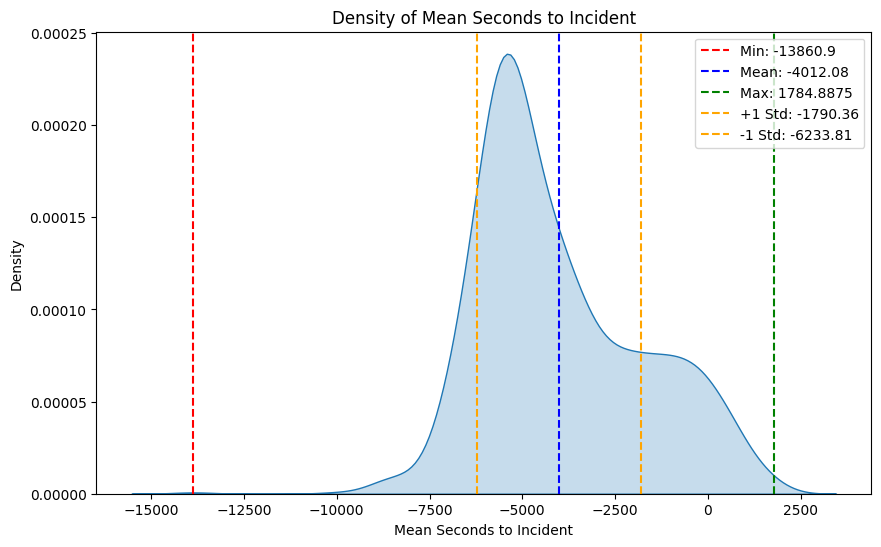

In [24]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['mean_seconds'].min()
mean_val = sncb_df['mean_seconds'].mean()
max_val = sncb_df['mean_seconds'].max()
std_val = sncb_df['mean_seconds'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['mean_seconds'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')

plt.title('Density of Mean Seconds to Incident')
plt.xlabel('Mean Seconds to Incident')
plt.ylabel('Density')
plt.legend()
plt.show()

In [25]:
sncb_df['max_seconds'] = sncb_df['seconds_to_incident_sequence'].apply(lambda x: max(x))

sncb_df['max_seconds'].describe()

count     1011.000000
mean      3145.054402
std       1103.024622
min     -13328.000000
25%       3314.500000
50%       3557.000000
75%       3588.000000
max       3600.000000
Name: max_seconds, dtype: float64

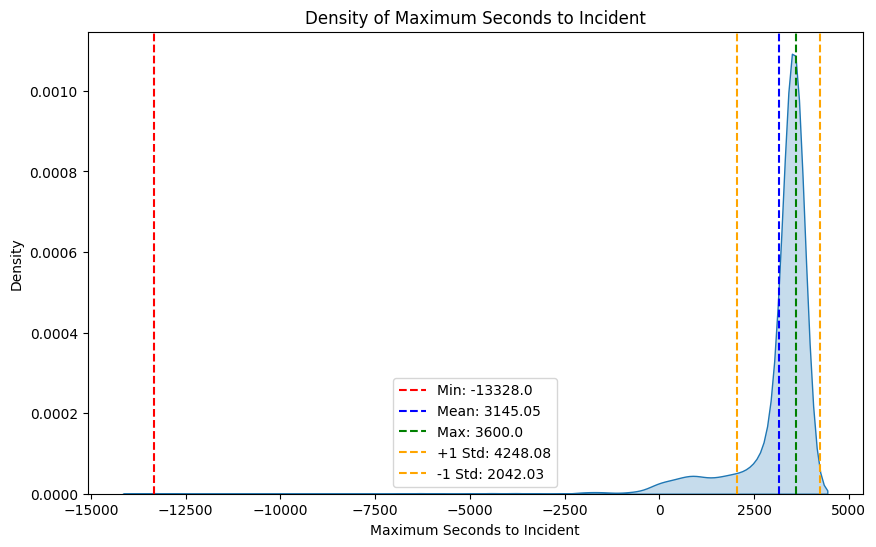

In [26]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['max_seconds'].min()
mean_val = sncb_df['max_seconds'].mean()
max_val = sncb_df['max_seconds'].max()
std_val = sncb_df['max_seconds'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['max_seconds'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')

plt.title('Density of Maximum Seconds to Incident')
plt.xlabel('Maximum Seconds to Incident')
plt.ylabel('Density')
plt.legend()
plt.show()

There is at least one incident such that all its data is previous from the incident, several minutes actually.

In [27]:
row_with_negative_max_seconds = sncb_df[sncb_df['max_seconds'] < 0]
len(row_with_negative_max_seconds)

19

There are actually 19 incidents with that configuration of having only data from before the incident and not after.

In [28]:
sncb_df['delta_seconds'] = sncb_df['seconds_to_incident_sequence'].apply(lambda x: max(x) - min(x))

sncb_df['delta_seconds'].describe()

count     1011.000000
mean     15538.151335
std       3845.834852
min       1034.000000
25%      14660.500000
50%      17441.000000
75%      17943.500000
max      18000.000000
Name: delta_seconds, dtype: float64

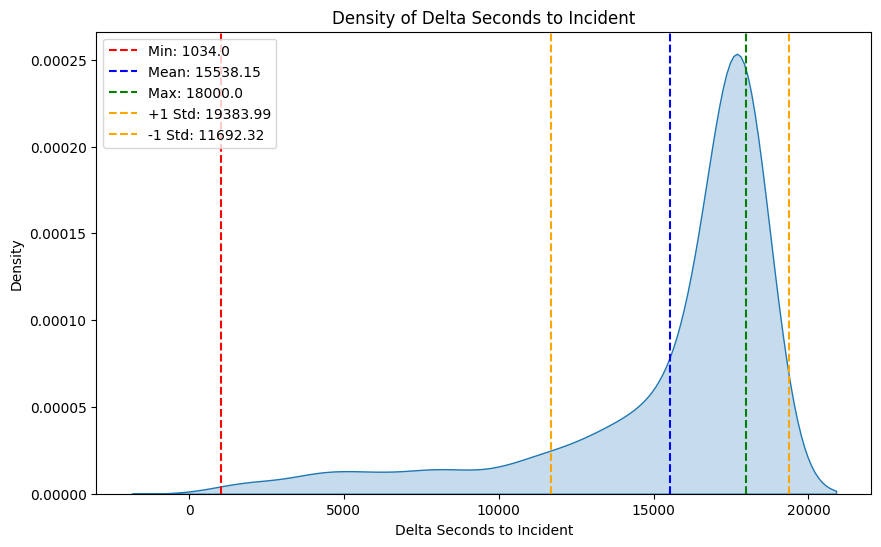

In [29]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['delta_seconds'].min()
mean_val = sncb_df['delta_seconds'].mean()
max_val = sncb_df['delta_seconds'].max()
std_val = sncb_df['delta_seconds'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['delta_seconds'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')

plt.title('Density of Delta Seconds to Incident')
plt.xlabel('Delta Seconds to Incident')
plt.ylabel('Density')
plt.legend()
plt.show()

In [30]:
sncb_df['events_per_second'] = sncb_df['events_sequence_size'] / sncb_df['delta_seconds']

sncb_df['events_per_second'].describe()

count    1011.000000
mean        0.034925
std         0.016402
min         0.001037
25%         0.024061
50%         0.034796
75%         0.044178
max         0.136824
Name: events_per_second, dtype: float64

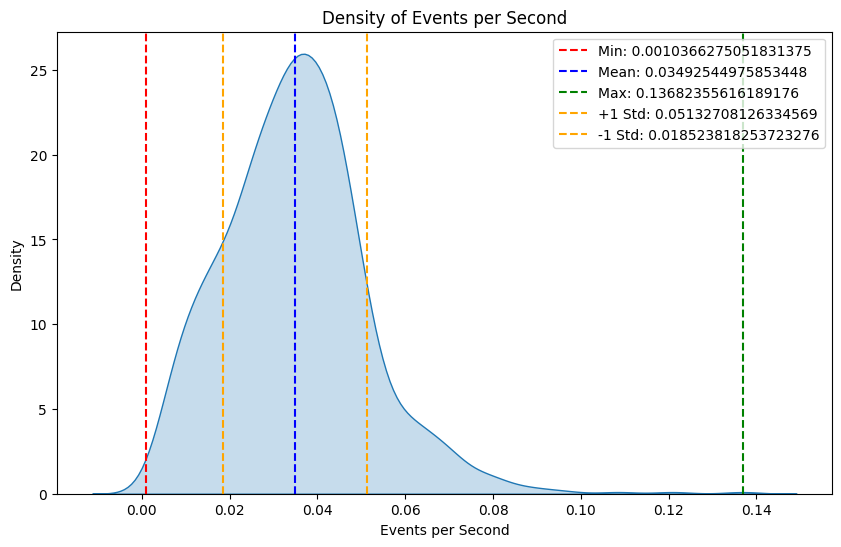

In [31]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['events_per_second'].min()
mean_val = sncb_df['events_per_second'].mean()
max_val = sncb_df['events_per_second'].max()
std_val = sncb_df['events_per_second'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['events_per_second'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val}')

plt.title('Density of Events per Second')
plt.xlabel('Events per Second')
plt.ylabel('Density')
plt.legend()
plt.show()

At most, every 10 seconds there is an event.

DATA TRANSFORMATION

DJ TIME

In [32]:
# get the freq of dj_ac on state and store in a new attribute
sncb_df['dj_ac_freq'] = sncb_df['dj_ac_state_sequence'].apply(lambda x: sum(x)/len(x))

sncb_df['dj_ac_freq'].describe()

count    1011.000000
mean        0.080617
std         0.214162
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: dj_ac_freq, dtype: float64

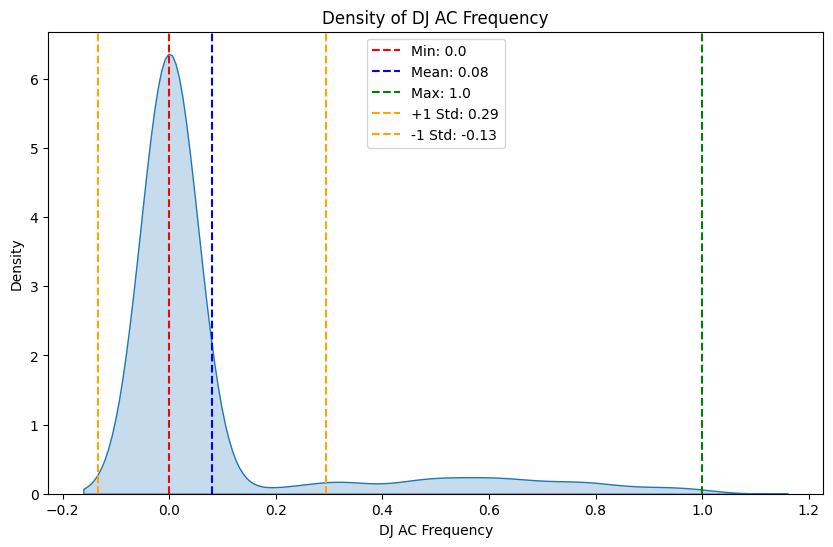

In [34]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['dj_ac_freq'].min()
mean_val = sncb_df['dj_ac_freq'].mean()
max_val = sncb_df['dj_ac_freq'].max()
std_val = sncb_df['dj_ac_freq'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['dj_ac_freq'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')

plt.title('Density of DJ AC Frequency')
plt.xlabel('DJ AC Frequency')
plt.ylabel('Density')
plt.legend()
plt.show()

Most of the time, dj ac is closer to off.

So dj_ac_freq ranges from 0 to 1 as expected and is usually closer to 0.

In [35]:
# get the freq of dj_dc on state and store in a new attribute
sncb_df['dj_dc_freq'] = sncb_df['dj_dc_state_sequence'].apply(lambda x: sum(x)/len(x))

sncb_df['dj_dc_freq'].describe()

count    1011.000000
mean        0.791179
std         0.293130
min         0.000000
25%         0.727189
50%         0.930147
75%         1.000000
max         1.000000
Name: dj_dc_freq, dtype: float64

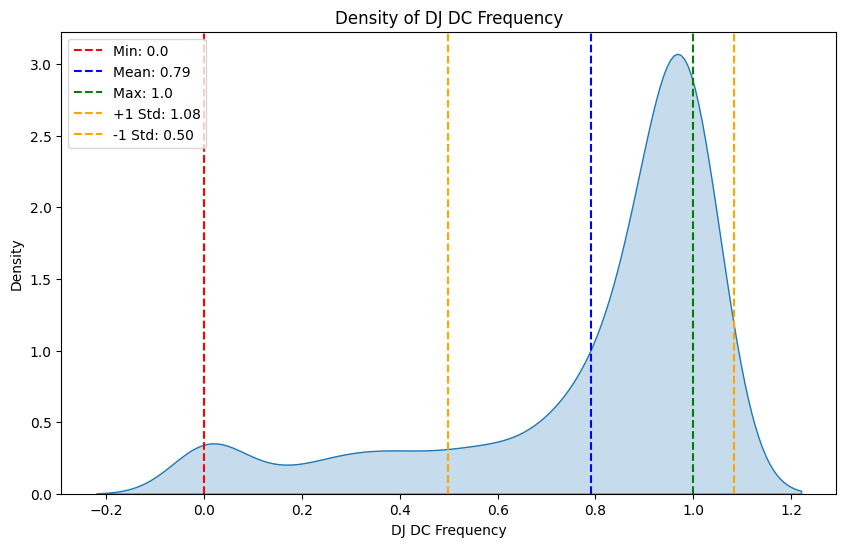

In [36]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['dj_dc_freq'].min()
mean_val = sncb_df['dj_dc_freq'].mean()
max_val = sncb_df['dj_dc_freq'].max()
std_val = sncb_df['dj_dc_freq'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['dj_dc_freq'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')

plt.title('Density of DJ DC Frequency')
plt.xlabel('DJ DC Frequency')
plt.ylabel('Density')
plt.legend()
plt.show()

Complementing the previous density plot, now we see that dj dc is often closer to on.

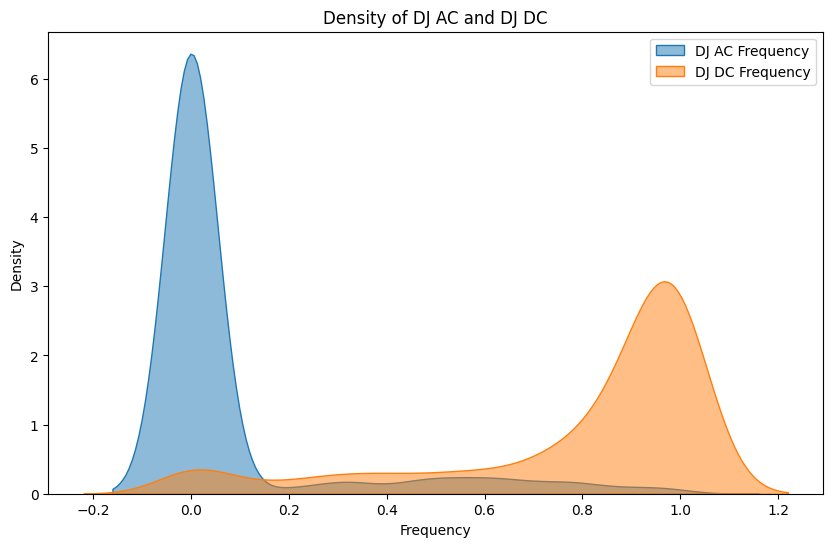

In [37]:
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['dj_ac_freq'], label='DJ AC Frequency', fill=True, alpha=0.5)
sns.kdeplot(sncb_df['dj_dc_freq'], label='DJ DC Frequency', fill=True, alpha=0.5)
plt.title('Density of DJ AC and DJ DC')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.legend()
plt.show()

In [38]:
# get the array where ac and dc were both on and store in a new attribute
sncb_df['dj_both_ac_dc'] = sncb_df['dj_ac_state_sequence'] * sncb_df['dj_dc_state_sequence']

# get the frequence when ac and dc were both on
sncb_df['dj_both_freq'] = sncb_df['dj_both_ac_dc'].apply(lambda x: sum(x)/len(x))

# get the basic statistics from dj_both_freq
sncb_df['dj_both_freq'].describe() # useless, because always 0

count    1011.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: dj_both_freq, dtype: float64

So ac and dc are never both on.

In [39]:
# get the array where ac and dc were both off and store in a new attribute
sncb_df['dj_neither_ac_dc'] = sncb_df['dj_ac_state_sequence'].apply(lambda x: np.logical_not(x)) * sncb_df['dj_dc_state_sequence'].apply(lambda x: np.logical_not(x))

# get the frequence when ac and dc were both off
sncb_df['dj_neither_freq'] = sncb_df['dj_neither_ac_dc'].apply(lambda x: sum(x)/len(x))

sncb_df['dj_neither_freq'].describe()

count    1011.000000
mean        0.128203
std         0.188396
min         0.000000
25%         0.000000
50%         0.056604
75%         0.160717
max         1.000000
Name: dj_neither_freq, dtype: float64

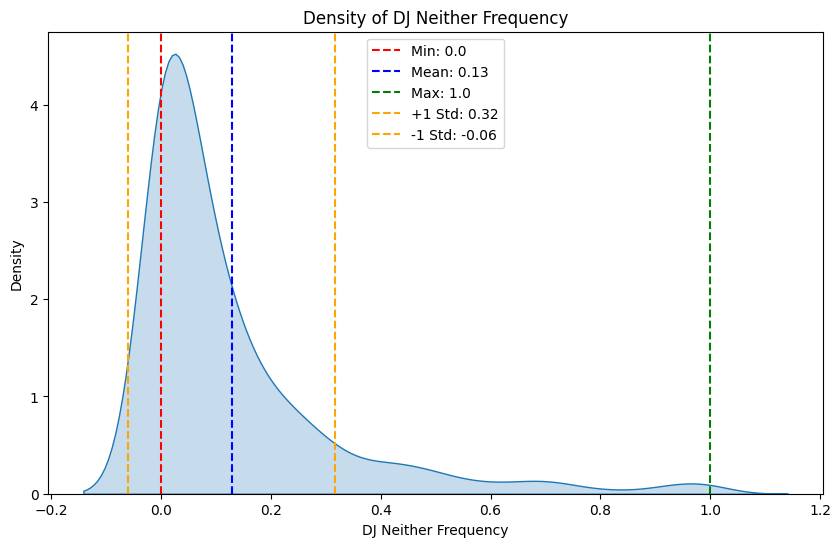

In [40]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['dj_neither_freq'].min()
mean_val = sncb_df['dj_neither_freq'].mean()
max_val = sncb_df['dj_neither_freq'].max()
std_val = sncb_df['dj_neither_freq'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['dj_neither_freq'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')

plt.title('Density of DJ Neither Frequency')
plt.xlabel('DJ Neither Frequency')
plt.ylabel('Density')
plt.legend()
plt.show()

So there are cases when the train is running on batteries (dj neither frequency = 1) the whole time recorded around the incident.

So when the frequency is 1, the train was running on batteries the full time of the record and if the frequency was higher than 0 the train at least once ran on batteries around the time of the incident.

TRANSFORMATION

VELOCITY

In [41]:
sncb_df['min_kph'] = sncb_df['train_kph_sequence'].apply(lambda x: min(x))

sncb_df['min_kph'].describe() # useless

count    1011.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: min_kph, dtype: float64

Always 0, so all trains stop around the time of the incident, but this feature/column can't be leveraged for ML because it's constant.

In [42]:
sncb_df['median_kph'] = sncb_df['train_kph_sequence'].apply(lambda x: np.median(x))

sncb_df['median_kph'].describe()

count    1011.000000
mean       26.398063
std        25.512113
min         0.000000
25%         0.000000
50%        29.600000
75%        41.775000
max       123.700000
Name: median_kph, dtype: float64

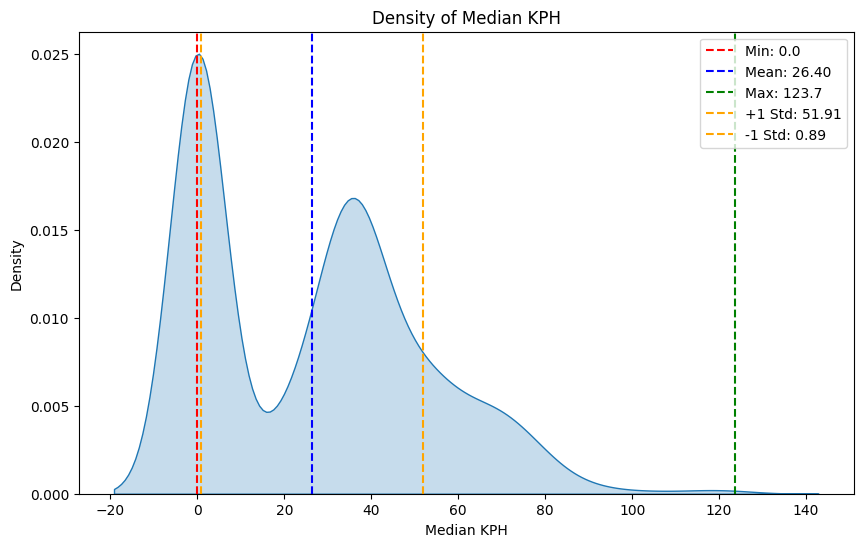

In [43]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['median_kph'].min()
mean_val = sncb_df['median_kph'].mean()
max_val = sncb_df['median_kph'].max()
std_val = sncb_df['median_kph'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['median_kph'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')

plt.title('Density of Median KPH')
plt.xlabel('Median KPH')
plt.ylabel('Density')
plt.legend()
plt.show()

In [44]:
sncb_df['mean_kph'] = sncb_df['train_kph_sequence'].apply(lambda x: np.mean(x))

sncb_df['mean_kph'].describe()

count    1011.000000
mean       33.798111
std        20.791141
min         0.000000
25%        17.406444
50%        37.834483
75%        47.787409
max        97.964565
Name: mean_kph, dtype: float64

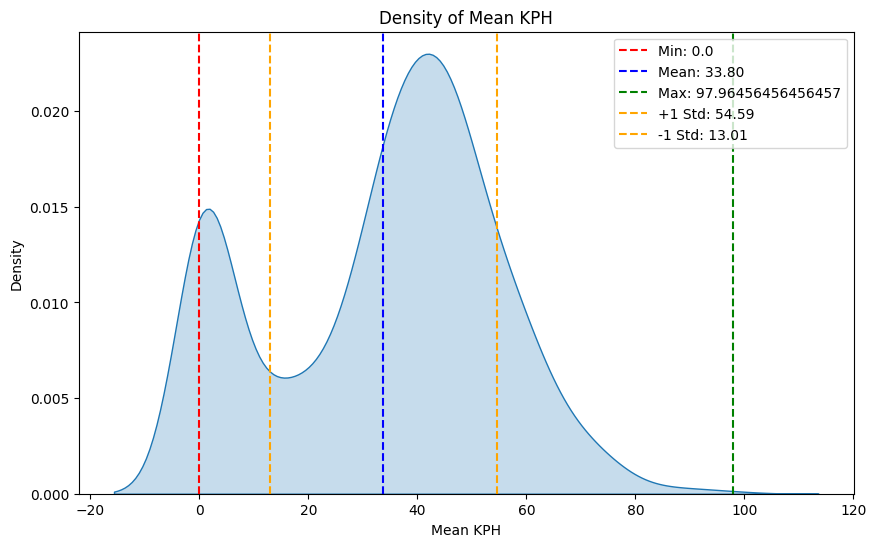

In [45]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['mean_kph'].min()
mean_val = sncb_df['mean_kph'].mean()
max_val = sncb_df['mean_kph'].max()
std_val = sncb_df['mean_kph'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['mean_kph'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')

plt.title('Density of Mean KPH')
plt.xlabel('Mean KPH')
plt.ylabel('Density')
plt.legend()
plt.show()

In [46]:
sncb_df['max_kph'] = sncb_df['train_kph_sequence'].apply(lambda x: max(x))

sncb_df['max_kph'].describe()

count    1011.000000
mean      114.213749
std        46.021810
min         0.000000
25%       114.000000
50%       125.500000
75%       142.450000
max       163.300000
Name: max_kph, dtype: float64

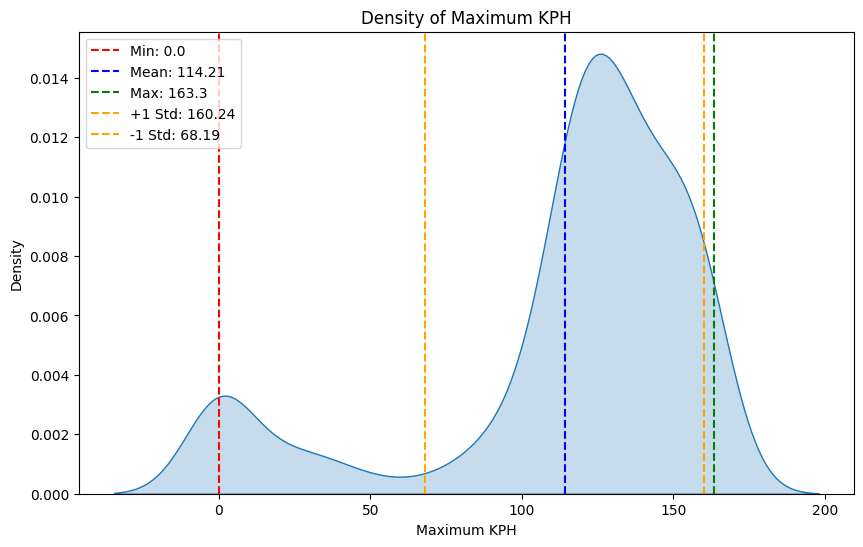

In [47]:
# Calculate min, mean, max, and standard deviation
min_val = sncb_df['max_kph'].min()
mean_val = sncb_df['max_kph'].mean()
max_val = sncb_df['max_kph'].max()
std_val = sncb_df['max_kph'].std()

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(sncb_df['max_kph'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.2f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.2f}')

plt.title('Density of Maximum KPH')
plt.xlabel('Maximum KPH')
plt.ylabel('Density')
plt.legend()
plt.show()

So the fastest train in the dataset gets as fast as 163.3 KPH.

In [48]:
row_with_zero_max_kph = sncb_df[sncb_df['max_kph'] == 0]
len(row_with_zero_max_kph)

71

We also see that 71 trains from the dataset don't move around the time of their incident.

In [49]:
sncb_df['delta_kph'] = sncb_df['train_kph_sequence'].apply(lambda x: max(x) - min(x))

sncb_df['delta_kph'].describe() # useless, because it's the same as max_kph

count    1011.000000
mean      114.213749
std        46.021810
min         0.000000
25%       114.000000
50%       125.500000
75%       142.450000
max       163.300000
Name: delta_kph, dtype: float64

In [50]:
max(sncb_df['max_kph'] - sncb_df['delta_kph'])

0.0

Just a reality check.

In [51]:
sncb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1011 entries, 0 to 1010
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   incident_id                   1011 non-null   int64  
 1   vehicles_sequence             1011 non-null   object 
 2   events_sequence               1011 non-null   object 
 3   seconds_to_incident_sequence  1011 non-null   object 
 4   approx_lat                    1011 non-null   float64
 5   approx_lon                    1011 non-null   float64
 6   train_kph_sequence            1011 non-null   object 
 7   dj_ac_state_sequence          1011 non-null   object 
 8   dj_dc_state_sequence          1011 non-null   object 
 9   incident_type                 1011 non-null   int64  
 10  u_vehicles_number             1011 non-null   int64  
 11  u_events_number               1011 non-null   int64  
 12  events_sequence_size          1011 non-null   int64  
 13  min_seco

In [52]:
# Get a list of columns with object dtype
object_columns = sncb_df.select_dtypes(include=['object']).columns

# Drop these columns from the DataFrame
basic_sncb_df = sncb_df.drop(columns=object_columns)

print(basic_sncb_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1011 entries, 0 to 1010
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   incident_id           1011 non-null   int64  
 1   approx_lat            1011 non-null   float64
 2   approx_lon            1011 non-null   float64
 3   incident_type         1011 non-null   int64  
 4   u_vehicles_number     1011 non-null   int64  
 5   u_events_number       1011 non-null   int64  
 6   events_sequence_size  1011 non-null   int64  
 7   min_seconds           1011 non-null   float64
 8   median_seconds        1011 non-null   float64
 9   mean_seconds          1011 non-null   float64
 10  max_seconds           1011 non-null   float64
 11  delta_seconds         1011 non-null   float64
 12  events_per_second     1011 non-null   float64
 13  dj_ac_freq            1011 non-null   float64
 14  dj_dc_freq            1011 non-null   float64
 15  dj_both_freq          1011

In [53]:
# List of columns to drop
columns_to_drop = ['dj_both_freq', 'min_kph', 'delta_kph']

# Drop the specified columns
basic_sncb_df = basic_sncb_df.drop(columns=columns_to_drop, errors='ignore')

print(basic_sncb_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1011 entries, 0 to 1010
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   incident_id           1011 non-null   int64  
 1   approx_lat            1011 non-null   float64
 2   approx_lon            1011 non-null   float64
 3   incident_type         1011 non-null   int64  
 4   u_vehicles_number     1011 non-null   int64  
 5   u_events_number       1011 non-null   int64  
 6   events_sequence_size  1011 non-null   int64  
 7   min_seconds           1011 non-null   float64
 8   median_seconds        1011 non-null   float64
 9   mean_seconds          1011 non-null   float64
 10  max_seconds           1011 non-null   float64
 11  delta_seconds         1011 non-null   float64
 12  events_per_second     1011 non-null   float64
 13  dj_ac_freq            1011 non-null   float64
 14  dj_dc_freq            1011 non-null   float64
 15  dj_neither_freq       1011

In [54]:
# save to csv a dataset with the derived basic statistics
# basic_sncb_df.to_csv('basic_sncb.csv', index=False)

In [55]:
def find_event_indexes(row, event_type_array):
  """
  Finds the indexes of occurrences of events from event_type_array in the events_sequence column of a given row.

  Args:
    row: A row from the DataFrame.
    event_type_array: An array of event types to search for.

  Returns:
    A dictionary where keys are event types and values are lists of their indexes in the events_sequence.
  """
  events_sequence = row['events_sequence']
  event_indexes = {}
  for event_type in event_type_array:
    indexes = np.where(events_sequence == event_type)[0]
    if indexes.size > 0 :
      event_indexes[event_type] = indexes.tolist()
  return event_indexes

In [56]:
def remove_events(row, event_type_array):
    """Removes occurrences of specified events from multiple sequences in a row."""
    event_indexes_dict = find_event_indexes(row, event_type_array)

    # Access sequences from the row using column names
    #vehicles_sequence = row["vehicles_sequence"]
    events_sequence = row["events_sequence"]
    #seconds_to_incident_sequence = row["seconds_to_incident_sequence"]
    #train_kph_sequence = row["train_kph_sequence"]
    #dj_ac_state_sequence = row["dj_ac_state_sequence"]
    #dj_dc_state_sequence = row["dj_dc_state_sequence"]

    # Create a boolean mask to identify elements to keep
    mask = np.ones_like(events_sequence, dtype=bool)  # Initialize all elements to True (keep)

    for event_type, indexes in event_indexes_dict.items():
        mask[indexes] = False  # Set elements to remove to False

    # Apply the mask to all sequences
    #vehicles_sequence = vehicles_sequence[mask]
    events_sequence = events_sequence[mask]
    #seconds_to_incident_sequence = seconds_to_incident_sequence[mask]
    #train_kph_sequence = train_kph_sequence[mask]
    #dj_ac_state_sequence = dj_ac_state_sequence[mask]
    #dj_dc_state_sequence = dj_dc_state_sequence[mask]

    return pd.Series({
        #"vehicles_sequence": vehicles_sequence,
        "events_sequence": events_sequence,
        #"seconds_to_incident_sequence": seconds_to_incident_sequence,
        #"train_kph_sequence": train_kph_sequence,
        #"dj_ac_state_sequence": dj_ac_state_sequence,
        #"dj_dc_state_sequence": dj_dc_state_sequence
    })

# Apply the function to the DataFrame
trans_sncb_df = sncb_df.apply(lambda row: remove_events(row, event_type_array), axis=1)

trans_sncb_df

,events_sequence
0,"[2744, 4004, 2852, 4110, 2854, 4396, 1132, 414..."
1,"[2744, 4148, 4394, 1566, 1570, 4396, 3634, 412..."
2,"[4394, 1566, 1570, 4114, 4168, 4168, 4156, 406..."
3,"[4066, 4066, 4066, 4066, 4068, 2742, 4026, 270..."
4,"[4002, 4032, 4028, 2852, 4026, 4110, 2742, 285..."
...,...
1006,"[4002, 2852, 4110, 2854, 4026, 4092, 4094, 261..."
1007,"[3490, 4068, 4068, 4068, 4068, 4068, 4068, 406..."
1008,"[4066, 4066, 4066, 4068, 3658, 4066, 3658, 406..."
1009,"[2956, 2956, 2956, 2956, 2956, 2956, 2956, 295..."


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all events sequences into a single list of strings
documents = [' '.join(sequence) for sequence in trans_sncb_df['events_sequence']]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Get the feature names (event types)
feature_names = vectorizer.get_feature_names_out()

# Print or use the tfidf_matrix and feature_names
print(tfidf_matrix.shape)
# feature_names

(1011, 826)


In [58]:
from sklearn.preprocessing import normalize

# Normalize the TF-IDF matrix at the document level
tfidf_matrix_normalized = normalize(tfidf_matrix, norm='l2', axis=1)

# Convert the normalized TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix_normalized.toarray(), columns=feature_names)

tfidf_df

,10,1000,1002,1004,1006,1008,1018,1020,1024,1028,...,962,964,972,978,982,984,986,990,992,998
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.005987,0.0,0.0,0.0,0.0,0.0
1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [59]:
tfidf_sncb_df = pd.concat([sncb_df[['incident_id', 'incident_type']], tfidf_df], axis=1)
tfidf_sncb_df

,incident_id,incident_type,10,1000,1002,1004,1006,1008,1018,1020,...,962,964,972,978,982,984,986,990,992,998
0,4432881,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,4432943,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,4432955,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,4433021,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,4433129,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,4611953,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1007,4611991,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1008,4612137,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.005987,0.0,0.0,0.0,0.0,0.0
1009,4612321,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [60]:
# save to csv the transformed dataset that will be used in the next steps of ML
# tfidf_sncb_df.to_csv('tfidf_sncb.csv', index=False)

In [61]:
complete_sncb_df = pd.concat([basic_sncb_df, tfidf_df], axis=1)

complete_sncb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1011 entries, 0 to 1010
Columns: 845 entries, incident_id to 998
dtypes: float64(840), int64(5)
memory usage: 6.5 MB


In [62]:
# save to csv a dataset that contains both basic statistics features and the tf-idf transformations
# complete_sncb_df.to_csv('complete_sncb.csv', index=False)